# UZOP Projekt

Early Predictor for Student Success Based on Behavioural and Demographical Indicators

# Učitavanje potrebnih paketa

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Učitavanje podataka


In [3]:
assessments = pd.read_csv("assessments.csv", sep = ",")
courses = pd.read_csv("courses.csv", sep = ",")
studentAssessment = pd.read_csv("studentAssessment.csv", sep = ",")
studentInfo = pd.read_csv("studentInfo.csv", sep = ",")
studentRegistration = pd.read_csv("studentRegistration.csv", sep = ",")
studentVle = pd.read_csv("studentVle.csv", sep = ",")
vle = pd.read_csv("vle.csv", sep = ",")

# Početni pregled podataka

### Pregled podataka

In [9]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [10]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [11]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [12]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [13]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [14]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [15]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


### Broj zapisa i značajki

In [38]:
assessments.shape

(206, 6)

In [31]:
courses.shape

(22, 3)

In [32]:
studentAssessment.shape

(173912, 5)

In [33]:
studentInfo.shape

(32593, 12)

In [34]:
studentRegistration.shape

(32593, 5)

In [35]:
studentVle.shape

(10655280, 6)

In [36]:
vle.shape

(6364, 6)

# Pregled vrsta značajki

In [63]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [64]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [66]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [67]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [68]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [69]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [70]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


# Deskriptivna statistika

In [40]:
assessments.describe(include = "all")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,195.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.005128,20.873786
std,NaN,NaN,10098.625521,NaN,76.001119,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,71.000000,0.000000
50%,NaN,NaN,25364.500000,NaN,152.000000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000


In [42]:
courses.describe(include = "all")

,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000


In [46]:
studentAssessment.describe(include = "all")

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [48]:
studentInfo.describe(include = "all")

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


In [50]:
studentRegistration.describe(include = "all")

,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32548.000000,10072.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.411300,49.757645
std,NaN,NaN,5.491673e+05,49.260522,82.460890
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-2.000000
50%,NaN,NaN,5.903100e+05,-57.000000,27.000000
75%,NaN,NaN,6.444530e+05,-29.000000,109.000000


In [52]:
studentVle.describe(include = "all")

,code_module,code_presentation,id_student,id_site,date,sum_click
count,10655280,10655280,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
unique,7,4,NaN,NaN,NaN,NaN
top,FFF,2014J,NaN,NaN,NaN,NaN
freq,4014499,3619452,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,NaN,NaN,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,NaN,NaN,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,NaN,NaN,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,NaN,NaN,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,NaN,NaN,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00


In [54]:
vle.describe(include = "all")

,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,6.364000e+03,6364,6364,6364,1121.000000,1121.000000
unique,NaN,7,4,20,NaN,NaN
top,NaN,FFF,2013J,resource,NaN,NaN
freq,NaN,1967,1772,2660,NaN,NaN
mean,7.260991e+05,NaN,NaN,NaN,15.204282,15.214987
std,1.283151e+05,NaN,NaN,NaN,8.792865,8.779806
min,5.267210e+05,NaN,NaN,NaN,0.000000,0.000000
25%,6.615928e+05,NaN,NaN,NaN,8.000000,8.000000
50%,7.300965e+05,NaN,NaN,NaN,15.000000,15.000000
75%,8.140162e+05,NaN,NaN,NaN,22.000000,22.000000


# Monotoni atributi

In [4]:
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [56]:
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [58]:
studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [59]:
studentInfo.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [60]:
studentRegistration.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [61]:
studentVle.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

In [62]:
vle.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

 Monotoni podaci su identifikatori kojima su podaci povezani te ih nećemo obrisati.

# Nedostajući podatci

In [4]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [5]:
# Ubacivanje srednje vrijednosti za nedostajuće podatke značajke "date"
assessments.loc[assessments.date.isna(),'date'] = assessments.loc[:,'date'].mean()

In [7]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [8]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [6]:
# Ubacivanje srednje vrijednosti za nedostajuće podatke značajke "score"
studentAssessment.loc[studentAssessment.score.isna(),'score'] = studentAssessment.loc[:,'score'].mean()

In [10]:
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [7]:
# izbaci stupac "imd_band"
studentInfo.drop(['imd_band'], axis=1, inplace=True)

In [12]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [8]:
# Ubacivanje srednje vrijednosti za nedostajuće podatke značajke "date_registration"
studentRegistration.loc[studentRegistration.date_registration.isna(),'date_registration'] = studentRegistration.loc[:,'date_registration'].mean()

# Značajku "date_unregistration" čemo ostaviti jer njena prazna vrijednost označava da student nije završio.

In [14]:
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [15]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [9]:
# izbaci stupac "week_from"
vle.drop(['week_from'], axis=1, inplace=True)

# izbaci stupac "week_to"
vle.drop(['week_to'], axis=1, inplace=True)

# Stršeći podatci

### Assessments

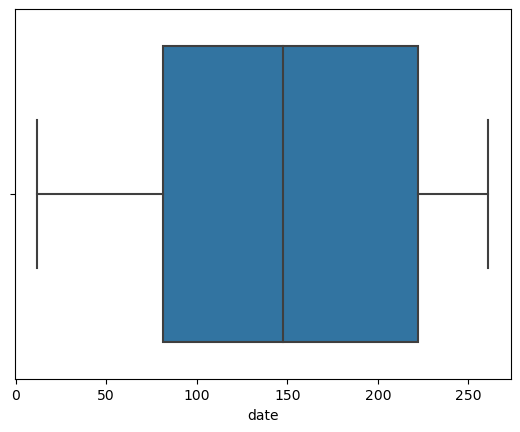

In [19]:
# Box plot za "date"
sns.boxplot(x=assessments['date'])
plt.show()

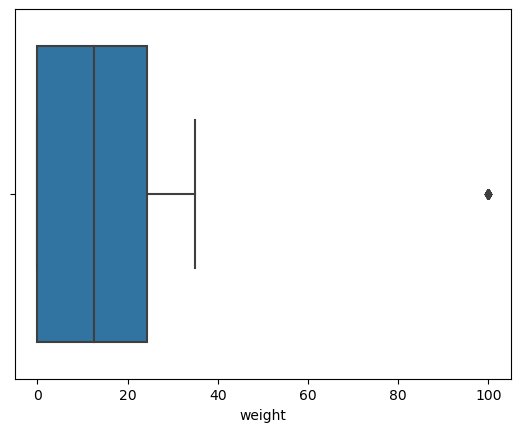

In [20]:
# Box plot za "weight"
sns.boxplot(x=assessments['weight'])
plt.show()

### Courses

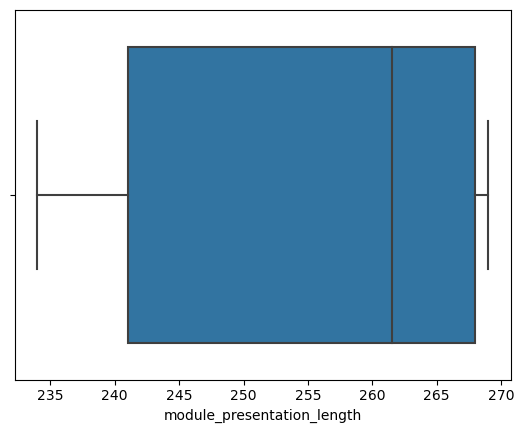

In [21]:
# Box plot za "module_presentation_length"
sns.boxplot(x=courses['module_presentation_length'])
plt.show()

### StudentAssessments

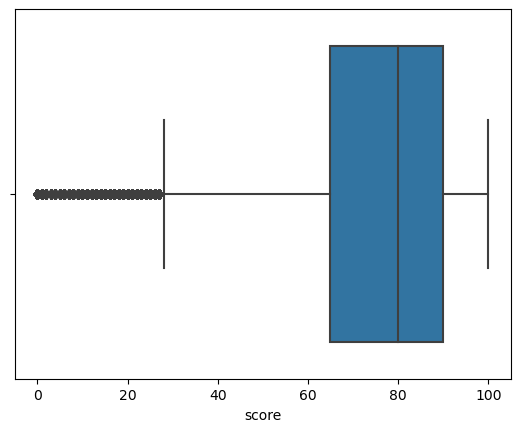

In [23]:
# Box plot za "score"
sns.boxplot(x=studentAssessment['score'])
plt.show()

### StudentInfo

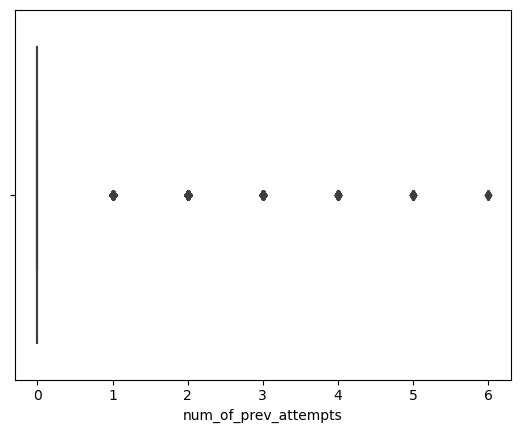

In [24]:
# Box plot za "num_of_prev_attempts"
sns.boxplot(x=studentInfo['num_of_prev_attempts'])
plt.show()

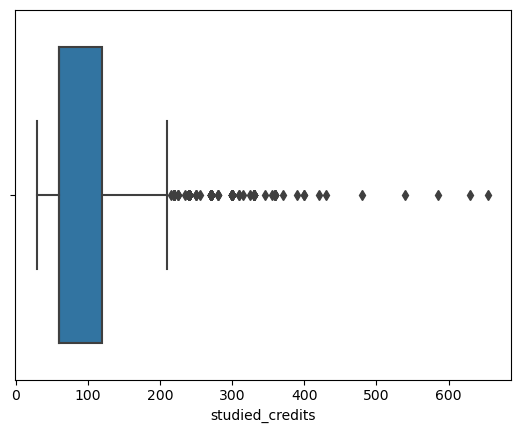

In [25]:
# Box plot za "studied_credits"
sns.boxplot(x=studentInfo['studied_credits'])
plt.show()

### StudentRegistration

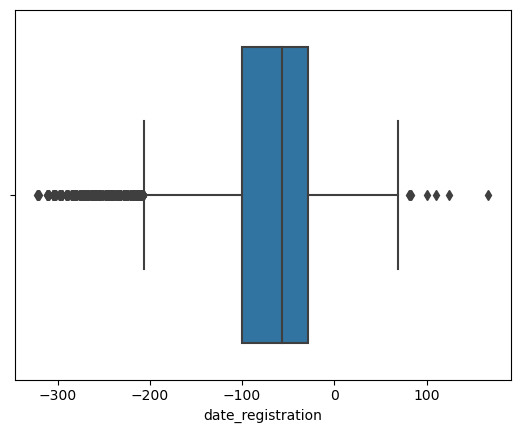

In [26]:
# Box plot za "date_registration"
sns.boxplot(x=studentRegistration['date_registration'])
plt.show()

### StudentVle

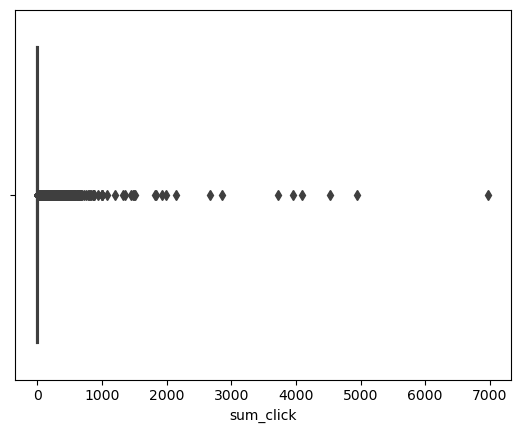

In [27]:
# Box plot za "sum_click"
sns.boxplot(x=studentVle['sum_click'])
plt.show()

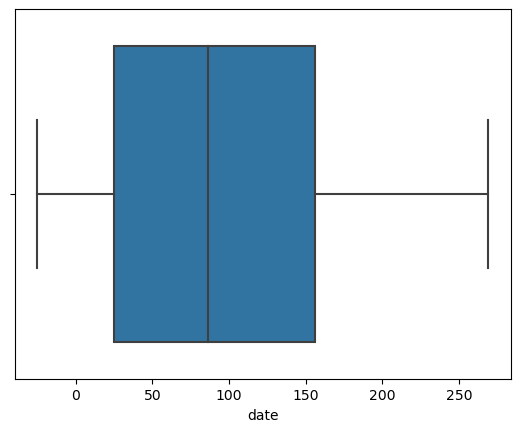

In [28]:
# Box plot za "date"
sns.boxplot(x=studentVle['date'])
plt.show()

# Vizualizacija

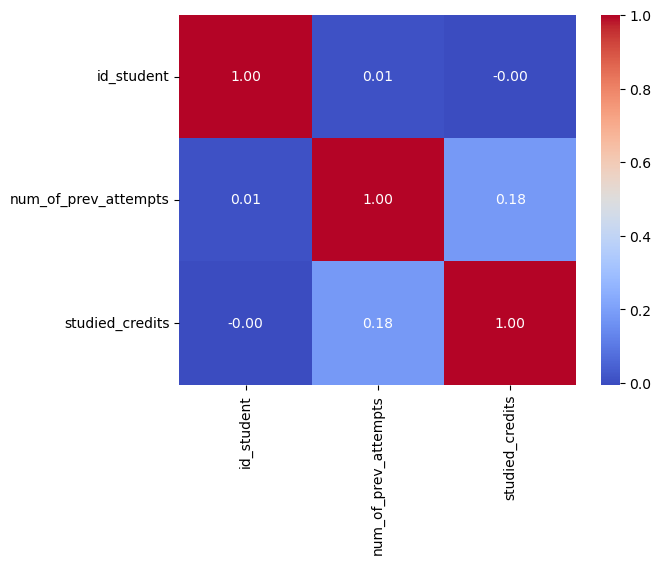

In [14]:
# Izdvajanje samo numeričkih značajki
numeric_features = studentInfo.select_dtypes(include=['int64', 'float64']).columns
numeric_data = studentInfo[numeric_features]

# Izračun korelacijske matrice
correlation_matrix_studentInfo = numeric_data.corr()

# Vizualizacija korelacijske matrice
sns.heatmap(correlation_matrix_studentInfo, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

/Users/marko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


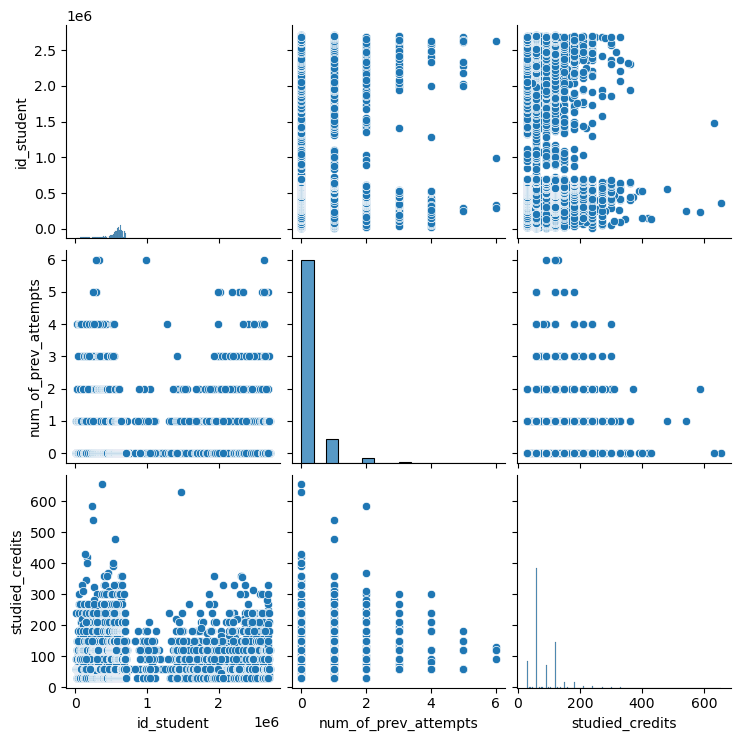

In [30]:
sns.pairplot(studentInfo)
plt.show()

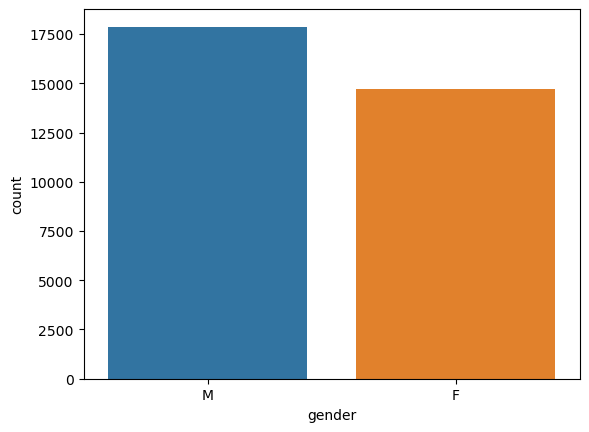

In [31]:
sns.countplot(x='gender', data=studentInfo)
plt.show()

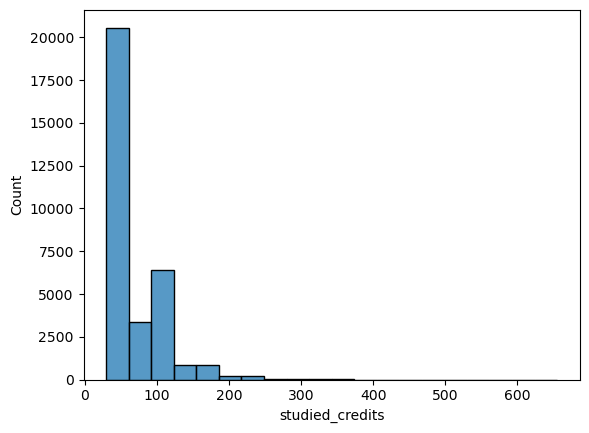

In [13]:
sns.histplot(x='studied_credits', data=studentInfo, bins=20)
plt.show()

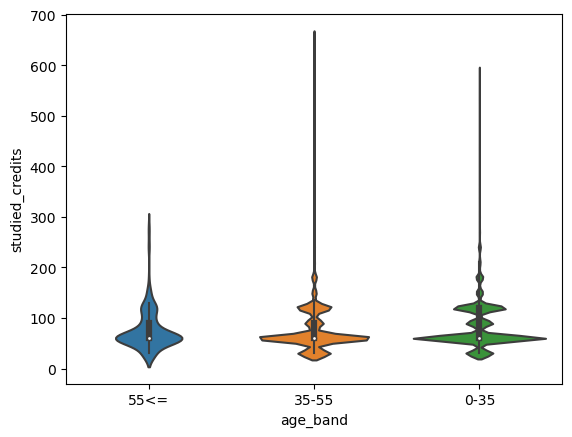

In [33]:
sns.violinplot(x='age_band', y='studied_credits', data=studentInfo)
plt.show()

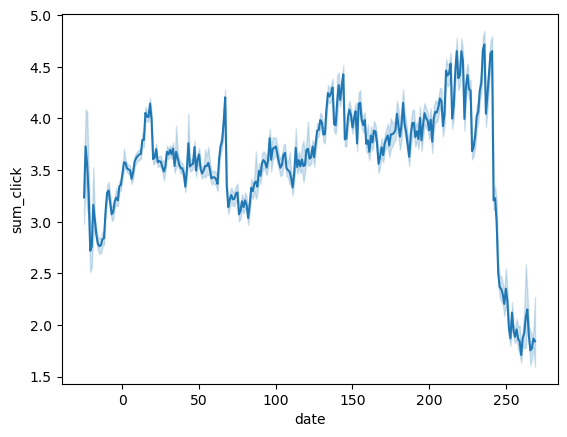

In [10]:
sns.lineplot(x='date', y='sum_click', data=studentVle)
plt.show()

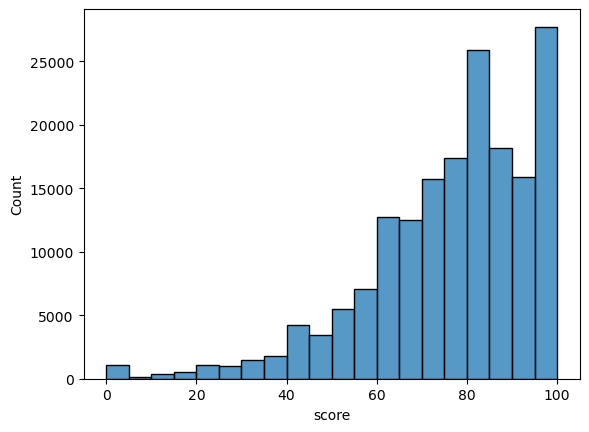

In [12]:
sns.histplot(x='score', data=studentAssessment, bins=20)
plt.show()